# mecab 토크나이저 다운로드

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 299kB/s 
     |████████████████████████████████| 450kB 52.2MB/s 
     |████████████████████████████████| 92kB 13.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-24 16:19:44--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=Zc9mU8ta%2FAAcEwMpO5tbH%2F5LYlE%3D&Expires=1624552794&AWSAccessKeyId=AKIA6KOSE

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import pickle
import re

drive.mount("/content/drive")
os.chdir("/content/drive/My Drive/BOAZ Conference/final_result")

Mounted at /content/drive


In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 92kB 3.0MB/s 
     |████████████████████████████████| 2.5MB 16.2MB/s 
     |████████████████████████████████| 1.2MB 36.6MB/s 
     |████████████████████████████████| 3.3MB 48.6MB/s 
     |████████████████████████████████| 901kB 24.6MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-cp37-none-any.whl size=126711 sha256=cb6fc32dcce98da2ac2b9ca5dfe71f505ca2c9024432979d0f5947aeffa377fb
  Stored in directory: /root/.cache/pip/wheels/38/d2/98/d191289a877a34c68aa67e05179521e060f96394a3e9336be6
Successfully built sentence-transformers
ERROR: transformers 4.8.2 has requirement huggingface-hub==0.0.12, but you'll have huggingface-hub 0.0.13 which is incompatible.


# 데이터 전처리


1. nice 신용정보평가 데이터 전처리
2. 로켓펀치 데이터 전처리
3. demoday 데이터 전처리
3. 데이터 합친 후, 토큰화


In [ ]:
#nice 신용정보 평가 데이터 불러오기
cm_guide= pd.read_pickle('stock.pkl')
cm_guide['long_text'] = cm_guide['long_text'].apply(lambda x:  ' '.join(x).replace('- ', ''))

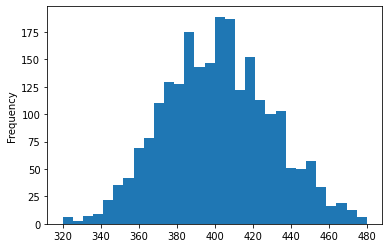

In [ ]:
# 설명데이터 문장 길이 분포
cm_guide['len'] = cm_guide['long_text'].apply(lambda x: len(x))
cm_guide = cm_guide[cm_guide['len'] != 0].reset_index(drop=True)
cm_guide['len'].plot(kind='hist', bins=30)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

eng_stopwords = stopwords.words('english')
eng_stopwords = [word for word in eng_stopwords if len(word) > 1]
eng_stopwords = [r'\b'+word.replace("'", "\b'")+r'\b' for word in eng_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 설명 데이터 내 불용어 + 영어 불용어 제거

stop_words = ['2020년 12월', '전년동기', '전년대비', '연결기준', '대비', '매출액', '영업이익', '당기순이익', 
                '별도기준', '당기', '경영실적' ,'전년동기', '연결대상', '종속회사', '전년', '동사', '흑자전환', '적자전환',
               '성장', '국내', '매출', '기반', '주요', '증가', '영위'  '진행', '지속', '종속',
              '관련', '상장', '개발',  '악화', '축소', '사람', '세상', '가치', '생각', '판매', '부진',
              '사회', '변화', '목표', '경험', '정보', '혁신', '의미', '소통', '행복', '아이디어', '노력', 
              '시작', '문화', '시간', '시작', '준비', '한국', '인재', '기획', '선정', '전문가', '이상', '영업', '확대',
              '수익', '영향', '개선', '코로나','목적', '하락', '실적', '부담', '확대', '코스닥', '감소', 
              '손실', '세계', '최고', '자신', '필요', '고민', '문제', '지원', '관리', '동기', '유지', '글로벌', '세계', 
              '보유', '사랑', '신규', '사원수', '자본금', '규모', '위치', '서울', '중소', '강남구', '마포구', '강소', 
              '역삼동', '구로구', '벤처', '성동구', '서초구', '노동부', '빌딩', '가산동', '고용', '송파구', '금천구']
stop_words += eng_stopwords
temp = "("+"|".join(stop_words)+")"
temp

"(2020년 12월|전년동기|전년대비|연결기준|대비|매출액|영업이익|당기순이익|별도기준|당기|경영실적|전년동기|연결대상|종속회사|전년|동사|흑자전환|적자전환|성장|국내|매출|기반|주요|증가|영위진행|지속|종속|관련|상장|개발|악화|축소|사람|세상|가치|생각|판매|부진|사회|변화|목표|경험|정보|혁신|의미|소통|행복|아이디어|노력|시작|문화|시간|시작|준비|한국|인재|기획|선정|전문가|이상|영업|확대|수익|영향|개선|코로나|목적|하락|실적|부담|확대|코스닥|감소|손실|세계|최고|자신|필요|고민|문제|지원|관리|동기|유지|글로벌|세계|보유|사랑|신규|사원수|자본금|규모|위치|서울|중소|강남구|마포구|강소|역삼동|구로구|벤처|성동구|서초구|노동부|빌딩|가산동|고용|송파구|금천구|\\bme\\b|\\bmy\\b|\\bmyself\\b|\\bwe\\b|\\bour\\b|\\bours\\b|\\bourselves\\b|\\byou\\b|\\byou\x08're\\b|\\byou\x08've\\b|\\byou\x08'll\\b|\\byou\x08'd\\b|\\byour\\b|\\byours\\b|\\byourself\\b|\\byourselves\\b|\\bhe\\b|\\bhim\\b|\\bhis\\b|\\bhimself\\b|\\bshe\\b|\\bshe\x08's\\b|\\bher\\b|\\bhers\\b|\\bherself\\b|\\bit\\b|\\bit\x08's\\b|\\bits\\b|\\bitself\\b|\\bthey\\b|\\bthem\\b|\\btheir\\b|\\btheirs\\b|\\bthemselves\\b|\\bwhat\\b|\\bwhich\\b|\\bwho\\b|\\bwhom\\b|\\bthis\\b|\\bthat\\b|\\bthat\x08'll\\b|\\bthese\\b|\\bthose\\b|\\bam\\b|\\bis\\b|\\bare\\b|\\bwas\\b|\\bwere\\b|\\bbe\\b|\\bbeen\\b|\\bbeing\\b|\\bha

In [ ]:
def cm_preprocessing(x):
  text = re.sub('\d+년\w*\s*|\d+월\w*\s*|\d+일\w*\s*', '', x)
  text = re.sub('.코로나19 사태로 사업보고서 지연 제출.', ' ', text)
  text = re.sub('\S+[.]*%\s*\S+', '', text)
  text = re.sub('[-=+,#/\?:^$@*\"※~&%ㆍ!』/\|\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  text = re.sub('[^가-힣|a-zA-Z|\s|0-9|.]+', '', text)
  text = re.sub('\s{2,}', ' ', text)
  text_list = text.split('. ')
  text_list = list(map(lambda x: re.sub('(\w*\s*)'+temp+'(\w*\s*)', '', x), text_list))
  text_list = [text.strip() for text in text_list]
  text_list = [text + '.' for text in text_list[:-1]]

  return text_list

In [ ]:
cm_guide['fined_text'] = cm_guide['long_text'].apply(lambda x: cm_preprocessing(x))
cm_guide['fined_text']

0       [반도체 웨이퍼캐리어 박스 및 공업용 열량계 환경시험장치 등의 생산 주력사업으로 영...
1       [지배회사인 아주엘앤에프홀딩스주를 합병하여 자회사 등에 대한 사업 등을 영위하는 지...
2       [설립되어 투자사업부문과 화학제품 제조 인적분할하여 순수지주회사로 전환하였음., 사...
3       [지주사 전환을 위해 투자사업 부문의 APS홀딩스주구 에이피시스템 존속법인와 장비사...
4       [ASP홀딩스존속법인 지주회사의 디스플레이반도체 장비 제조 사업부문이 인적분할되어 ...
                              ...                        
2310    [식음료 제조기업으로 과일농축액스무디와 같은 음료베이스와 주스 등의 과일 및 채소음...
2311    [손해보험 및 이의 재보험과 보험금 지급을 위한 재산이용 본부와 지점 보상사무실을 ...
2312    [설립되어 동남아 일본 및 중국 항로를 중심으로 해상화물운송용역의 제공을 하고 있음...
2313    [건축설계 및 감리 엔지니어링사업을 주된., 해외시장 위해 우수한 기술인력확보와 새...
2314    [디스플레이 제조사에 OLED 마스크 공정 및 글라스 장비를 사업으로 영위함., 주...
Name: fined_text, Length: 2315, dtype: object

In [ ]:
#로켓 펀치 데이터 불러오기
temp1 = pd.read_csv('rocket_punch1.csv')
temp2 = pd.read_csv('rocket_punch2.csv')
temp3 = pd.read_csv('rocket_punch3.csv')

df = pd.concat([temp1, temp2, temp3]).reset_index(drop=True)
del temp1, temp2, temp3
df = df[['company_name', 'short_text', 'long_text']]
df['company_name'] = df['company_name'].str.replace('(주)','')
df = df.loc[df['long_text'].dropna().index,:].reset_index(drop=True)
df['len'] = df['long_text'].apply(lambda x: len(x))
df

,company_name,short_text,long_text,len
0,에스비티엠,기업 출장(안전이동) 관리\n,"SBTM은 2017년 호텔신라에서 분사한 자회사로Digital Platform, ...",679
1,에이치디정션,"Human-Data Junction, 의료데이터 스타트업 입니다.\n",https://www.hdjunction.co.kr에이치디정션은 건강한 Healt...,1254
2,스탁키퍼,"소비와 생산, 그 경계를 무너뜨립니다.\n","stockeeper는 생산자와 투자자를 연결해줌으로써 새로운 시장을 만들고, 그로...",459
3,행파이브,HangFive는 사주궁합 및 점성술 등 운세 관련 콘텐츠를 온라인 소개팅 서비스와...,Hang5는 사주궁합 및 점성술 등 운세 관련 콘텐츠를 온...,113
4,지지더블유피,e스포츠 선수 데이터 아카이빙 서비스 익플(EXPLE)을 개발합니다. 현재 배틀그라...,[GGWP]아마추어 이스포츠 선수들은 열정은 있지만 활동할 수 있는 무대가 없습니...,1052
...,...,...,...,...
12632,()타이거티앤엘,\n,VIP 전문여행사\n,24
12633,포인트나인,"온라인커머스를 기반으로 한 인큐베이팅 사업과 패션 사업(브랜드, 솔루션)\n","""인류 문명은 0.1%의 창의적 인간과,0.9%의 안목있는 사람들에 의해 건설됐으...",431
12634,DV,가상화폐 팀\n,안녕하세요 저희 팀은 가상화폐로 세상을 바꾸려 하는 팀입니다.변호사 펀드매니저등 ...,444
12635,DV,가상화폐 팀\n,안녕하세요 저희 팀은 가상화폐로 세상을 바꾸려 하는 팀입니다.변호사 펀드매니저등 ...,444


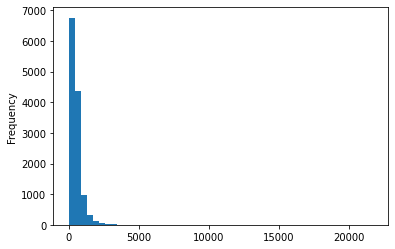

In [ ]:
# 설명 데이터 문장 길이 분포
df['len'].plot(kind='hist', bins=50)

In [ ]:
!pip install kss

In [ ]:
import kss

def preprocessing(x):
  text = re.sub('.+\n더 보기\n','', x)
  text = re.sub('안녕하세요\S*', '', text)
  text = re.sub('\S+[.]*%\s*\S+', '', text)
  text = re.sub('\d+년\w*\s*|\d+월\w*\s*|\d+일\w*\s*', '', text)
  text = re.sub('[-=+,#/\?:^$@*\"※~&%ㆍ!』/\|\\‘|\(\)\[\]\<\>`\'…》]', ' ', text)
  text = re.sub('[\W|0-9]+\s{2,}','', text)
  text = re.sub(r'\\[[^]]*\\]' ,'', text)
  text = re.sub('【[^】]*】', '', text)
  text = re.sub('●\s+[A-Z|a-z]+','' , text)
  text = re.sub("(http|ftp|https)://(?:[-\w.]|(?:\da-fA-F]{2}))+\S+", '' , text)
  text = re.sub('\w+@\S+', '', text)
  text = re.sub('\xa0', ' ', text)
  text = re.sub('[^가-힣|a-zA-Z|\s|0-9|.]+', '', text)
  text = re.sub('\d[.]\s*', '', text)
  text = re.sub(r'(www[.]).+([.]com)', '', text)
  text = re.sub('(www[.])\S*', '', text)
  text_list = kss.split_sentences(text)
  text_list = list(map(lambda x: re.sub('(\w*\s*)'+temp+'(\w*\s*)', '', x), text_list))
  text_list = list(map(lambda x: re.sub('\s{2,}', ' ', x), text_list))
  text_list = list(map(lambda x: x.strip(), text_list))
  text_list = text_list[:4]

  return text_list

In [ ]:
df['fined_text'] = df['long_text'].apply(lambda x: preprocessing(x))
df['fined_text']

0        [SBTM은 호텔신라에서 분사한 자회사로Digital 네트워크 거점 8개국 및 K ...
1        [https 건강한 Healthcare ICT 생태계 합니다., 인간을 중심에 둔 ...
2        [stockeeper는 생산자와 투자자를 연결해줌으로써 새로운 시장을 만들고 그로 ...
3        [Hang5는 사주궁합 및 점성술 등 콘텐츠를 온라인 소개팅 서비스와 융합해 운세에...
4        [GGWP 아마추어 이스포츠 선수들은 열정은 있지만 활동할 수 있는 무대가 없습니다...
                               ...                        
12632                                          [VIP 전문여행사]
12633    [인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다,...
12634    [저희 팀은 바꾸려 하는 팀입니다., 변호사 되어있습니다., 이더리움 코드에 분만 ...
12635    [저희 팀은 바꾸려 하는 팀입니다., 변호사 되어있습니다., 이더리움 코드에 분만 ...
12636    [HMM은 컨테이너선 드라이벌크선 및 유조선 등을 통해 사업을 운영하는 해운회사입니...
Name: fined_text, Length: 12637, dtype: object

In [ ]:
# 문장 개수 1개 이하인 기업 제거
df['n_sent'] = df['fined_text'].apply(lambda x: len(x))
df = df[df['n_sent'] > 1] 
df = df.drop('n_sent', axis=1).reset_index(drop=True)
df

,company_name,short_text,long_text,len,fined_text
0,에스비티엠,기업 출장(안전이동) 관리\n,"SBTM은 2017년 호텔신라에서 분사한 자회사로Digital Platform, ...",679,[SBTM은 호텔신라에서 분사한 자회사로Digital 네트워크 거점 8개국 및 K ...
1,에이치디정션,"Human-Data Junction, 의료데이터 스타트업 입니다.\n",https://www.hdjunction.co.kr에이치디정션은 건강한 Healt...,1254,"[https 건강한 Healthcare ICT 생태계 합니다., 인간을 중심에 둔 ..."
2,스탁키퍼,"소비와 생산, 그 경계를 무너뜨립니다.\n","stockeeper는 생산자와 투자자를 연결해줌으로써 새로운 시장을 만들고, 그로...",459,[stockeeper는 생산자와 투자자를 연결해줌으로써 새로운 시장을 만들고 그로 ...
3,지지더블유피,e스포츠 선수 데이터 아카이빙 서비스 익플(EXPLE)을 개발합니다. 현재 배틀그라...,[GGWP]아마추어 이스포츠 선수들은 열정은 있지만 활동할 수 있는 무대가 없습니...,1052,[GGWP 아마추어 이스포츠 선수들은 열정은 있지만 활동할 수 있는 무대가 없습니다...
4,피플로드,지인기반 소셜네트워크서비스\n,저희는 지인을 통한 신뢰 기반의 소셜네트워크서비스를 개발/서비스하고 있는 기업 입...,777,"[저희는 지인을 통한 서비스하고 있는 기업 입니다., 급여만으로는 이젠 집구하기가 ..."
...,...,...,...,...,...
8621,Suresoft Technologies Inc.,\n,[소개]Quality in your sw“소프트웨어 설계부터 검증까지” 슈어소프트...,988,[소개 sw소프트웨어 설계부터 검증까지 슈어소프트테크 주 는 설계 구현 시험 검증 ...
8622,포인트나인,"온라인커머스를 기반으로 한 인큐베이팅 사업과 패션 사업(브랜드, 솔루션)\n","""인류 문명은 0.1%의 창의적 인간과,0.9%의 안목있는 사람들에 의해 건설됐으...",431,"[인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다,..."
8623,DV,가상화폐 팀\n,안녕하세요 저희 팀은 가상화폐로 세상을 바꾸려 하는 팀입니다.변호사 펀드매니저등 ...,444,"[저희 팀은 바꾸려 하는 팀입니다., 변호사 되어있습니다., 이더리움 코드에 분만 ..."
8624,DV,가상화폐 팀\n,안녕하세요 저희 팀은 가상화폐로 세상을 바꾸려 하는 팀입니다.변호사 펀드매니저등 ...,444,"[저희 팀은 바꾸려 하는 팀입니다., 변호사 되어있습니다., 이더리움 코드에 분만 ..."


In [ ]:
# 데모데이 데이터 불러오기

demoday = pd.read_pickle('demoday.pkl')
demoday = demoday.drop('product', axis=1)
demoday = demoday.rename(columns={'name':'company_name', 'descript':'long_text'})
demoday

,company_name,long_text
0,쿠돈,쿠돈은 [중고명품 거래의 새로운 기준]을 모토로 2018년 6월 런칭한 스타트업입니...
1,이끌라,스타일 테크 기업 '이끌라'\n\n세상의 모든 명품을 한곳에서\n더 저렴하게 더 확...
2,비알스톰,비알스톰은 AI 기술에 기반한 셀러 어시스턴트와 마케팅 오토메이션 등 셀러는 판매에...
3,커넥틀리,커넥틀리는 엄마들의 쇼핑 경험 혁신을 통해 유아동 라이프 스타일의 새로운 패러다임을...
4,유스풀제스트,"펫푸드 유통, 교육 전문 플랫폼"
...,...,...
3514,시스루테크,"""이제 활짝 웃으며 교정하세요""\n\n시스루테크는 '시스루 투명교정' 솔루션을 제공..."
3515,인터뷰링크,인터뷰링크는 \n글로벌리서치에이전시로 글로벌인사이트포럼이라는 \n전문가네트워크를 관...
3516,에이치앤에이치상상공간,H&H상상공간은 애견 기저귀 중에서 수컷의 1회용 기저귀를 제조 및 판매하는 회사...
3517,SHAPL,"SHAPL은 S ""sincerity""정직을 통한 신뢰, H ""harmony"" 조화로..."


In [ ]:
def demoday_preprocessing(x):
  text = re.sub('\S+[.]*%\s*\S+', '', x)
  text = re.sub('[-=+,#/\?:^$@*\"※~&%ㆍ!』/\|\\‘|\(\)\[\]\<\>`\'…》]', ' ', text)
  text = re.sub(r'\\[[^]]*\\]' ,'', text)
  text = re.sub('【[^】]*】', '', text)
  text = re.sub('●\s+[A-Z|a-z]+','' , text)
  text = re.sub("(http|ftp|https)://(?:[-\w.]|(?:\da-fA-F]{2}))+\S+", '' , text)
  text = re.sub('\w+@\S+', '', text)
  text = re.sub('\xa0', ' ', text)
  text = re.sub('[^가-힣|a-zA-Z|\s|0-9|.]+', '', text)
  text = re.sub('안녕하세요\S*', '', text)
  text = re.sub('\d+년\w*\s*|\d+월\w*\s*|\d+일\w*\s*', '', text)
  text = re.sub('\d[.]\s*', '', text)
  text = re.sub(r'(www[.]).+([.]com)', '', text)
  text_list = kss.split_sentences(text)
  text_list = list(map(lambda x: re.sub('(\w*\s*)'+temp+'(\w*\s*)', '', x), text_list))
  text_list = list(map(lambda x: re.sub('\s{2,}', ' ', x), text_list))
  text_list = list(map(lambda x: re.sub('\n', ' ', x), text_list))
  text_list = list(map(lambda x: x.strip(), text_list))

  return text_list

In [ ]:
# 문장 길이 1 이하인 기업 제거

demoday['fined_text'] = demoday['long_text'].apply(lambda x: demoday_preprocessing(x))
demoday['n_sent'] = demoday['fined_text'].apply(lambda x: len(x))
demoday = demoday[demoday['n_sent'] > 1] 
demoday = demoday.drop('n_sent', axis=1).reset_index(drop=True)

In [ ]:
# 전처리 후 문서 길이 최소 100 이상

demoday['train_data'] = demoday['fined_text'].apply(lambda x: ' '.join(x))
demoday['len'] = demoday['train_data'].str.len()
demoday = demoday[demoday['len'] > 100].reset_index(drop=True)
demoday

,company_name,long_text,fined_text,train_data,len
0,쿠돈,쿠돈은 [중고명품 거래의 새로운 기준]을 모토로 2018년 6월 런칭한 스타트업입니...,"[쿠돈은 중고명품 거래의 새로운 기준 을 모토로 런칭한 스타트업입니다., 거래되는 ...",쿠돈은 중고명품 거래의 새로운 기준 을 모토로 런칭한 스타트업입니다. 거래되는 모든...,177
1,이끌라,스타일 테크 기업 '이끌라'\n\n세상의 모든 명품을 한곳에서\n더 저렴하게 더 확...,[스타일 테크 기업 모든 명품을 한곳에서 더 저렴하게 더 확실하게 명품쇼핑 할 수 ...,스타일 테크 기업 모든 명품을 한곳에서 더 저렴하게 더 확실하게 명품쇼핑 할 수 있...,287
2,비알스톰,비알스톰은 AI 기술에 기반한 셀러 어시스턴트와 마케팅 오토메이션 등 셀러는 판매에...,[비알스톰은 AI 셀러 어시스턴트와 마케팅 오토메이션 등 집중할 수 있도록 셀러 중...,비알스톰은 AI 셀러 어시스턴트와 마케팅 오토메이션 등 집중할 수 있도록 셀러 중심...,210
3,코인원,"코인원은 ""우리가 가진 기술력으로 세상을 바꿔보자""는 꿈을 가진 사람들이 모여서 만...","[코인원은 우리가 가진 바꿔보자 는 꿈을 모여서 만든 회사입니다., 비트코인은 탄생...",코인원은 우리가 가진 바꿔보자 는 꿈을 모여서 만든 회사입니다. 비트코인은 탄생한 ...,229
4,오늘식탁,회사소개\n오늘회는 산지에서만 먹을 수 있었던 수산식품을 IT를 통해서 신선함을 배...,[회사소개 오늘회는 산지에서만 먹을 수 있었던 수산식품을 IT를 통해서 신선함을 운...,회사소개 오늘회는 산지에서만 먹을 수 있었던 수산식품을 IT를 통해서 신선함을 운영...,203
...,...,...,...,...,...
2370,코리아소셜스포츠,Korea Social Sports \n는 국내유일의 소셜스포츠리그 입니다.\n\n...,"[Korea Social Sports 소셜스포츠리그 입니다., K.S.S 는 성인남...",Korea Social Sports 소셜스포츠리그 입니다. K.S.S 는 성인남녀들...,177
2371,닷밀,.mill은 서로 전혀 다른 재능을 가진 두 명의 젊은이가 모여 2012년 1월에 ...,[.mill은 서로 전혀 다른 재능을 가진 두 명의 젊은이가 현재의 새로운 하는 전...,.mill은 서로 전혀 다른 재능을 가진 두 명의 젊은이가 현재의 새로운 하는 전혀...,863
2372,인터뷰링크,인터뷰링크는 \n글로벌리서치에이전시로 글로벌인사이트포럼이라는 \n전문가네트워크를 관...,[북중미 유럽 투자 비지니스 리더들의 요청에 따라 여러 유료 자문 컨설팅 을 중개하...,북중미 유럽 투자 비지니스 리더들의 요청에 따라 여러 유료 자문 컨설팅 을 중개하는...,348
2373,에이치앤에이치상상공간,H&H상상공간은 애견 기저귀 중에서 수컷의 1회용 기저귀를 제조 및 판매하는 회사...,"[H H상상공간은 애견 기저귀 중에서 수컷의 1회용 기저귀를 제조 회사입니다., 현...",H H상상공간은 애견 기저귀 중에서 수컷의 1회용 기저귀를 제조 회사입니다. 현재 ...,198


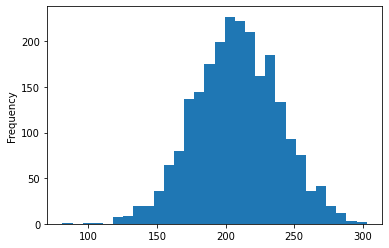

In [ ]:
# nice 신용평가 데이터 전처리 후 문장 길이 분포
cm_guide['train_data'] = cm_guide['fined_text'].apply(lambda x: ' '.join(x))
cm_guide['len'] = cm_guide['train_data'].str.len()
cm_guide['len'].plot(kind='hist', bins=30)

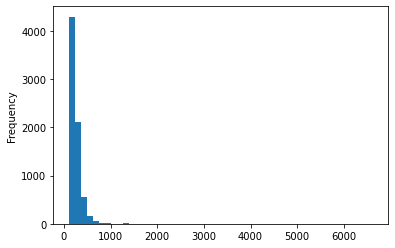

In [ ]:
# 로켓펀치 데이터 전처리 후 문장 길이 분포
df['train_data'] = df['fined_text'].apply(lambda x: ' '.join(x))
df['len'] = df['train_data'].str.len()
df = df[df['len'] > 100] .reset_index(drop=True)
df['len'].plot(kind='hist', bins=50)

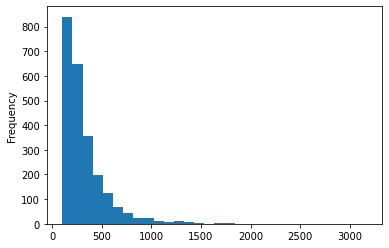

In [ ]:
# 데모데이 데이터 전처리후 문장 길이 분포

demoday['len'].plot(kind='hist', bins=30)

In [ ]:
# 세개의 데이터 합치기
demoday['short_text'] = ''
total_df = pd.concat([cm_guide, demoday, df])
total_df['company_name'] = total_df['company_name'].apply(lambda x: re.sub(r'\(주*\)', '', x))
total_df = total_df.drop_duplicates('company_name').reset_index(drop=True)
total_df

,company_name,long_text,len,fined_text,train_data,short_text
0,3S,"반도체 웨이퍼캐리어 박스 및 공업용 열량계, 환경시험장치 등의 생산 및 판매를 주력...",211,[반도체 웨이퍼캐리어 박스 및 공업용 열량계 환경시험장치 등의 생산 주력사업으로 영...,반도체 웨이퍼캐리어 박스 및 공업용 열량계 환경시험장치 등의 생산 주력사업으로 영위...,NaN
1,AJ네트웍스,동사는 2013년 12월 지배회사인 舊 아주엘앤에프홀딩스(주)를 합병하여 자회사 등...,246,[지배회사인 아주엘앤에프홀딩스주를 합병하여 자회사 등에 대한 사업 등을 영위하는 지...,지배회사인 아주엘앤에프홀딩스주를 합병하여 자회사 등에 대한 사업 등을 영위하는 지주...,NaN
2,AK홀딩스,"동사는 1970년 10월에 설립되어, 투자사업부문과 화학제품 제조 및 판매부문으로 ...",183,"[설립되어 투자사업부문과 화학제품 제조 인적분할하여 순수지주회사로 전환하였음., 사...",설립되어 투자사업부문과 화학제품 제조 인적분할하여 순수지주회사로 전환하였음. 사업부...,NaN
3,APS홀딩스,2017년 4월 지주사 전환을 위해 투자사업 부문의 APS홀딩스(주)(구 에이피시스...,210,[지주사 전환을 위해 투자사업 부문의 APS홀딩스주구 에이피시스템 존속법인와 장비사...,지주사 전환을 위해 투자사업 부문의 APS홀딩스주구 에이피시스템 존속법인와 장비사업...,NaN
4,AP시스템,"2017년 3월 ASP홀딩스(존속법인, 지주회사)의 디스플레이/반도체 장비 제조 사...",213,[ASP홀딩스존속법인 지주회사의 디스플레이반도체 장비 제조 사업부문이 인적분할되어 ...,ASP홀딩스존속법인 지주회사의 디스플레이반도체 장비 제조 사업부문이 인적분할되어 신...,NaN
...,...,...,...,...,...,...
10575,포레스트파트너스,포레스트 파트너스는 혁신적인 기업가들과 함께 위대한 기업을...,137,[포레스트 기업가들과 함께 위대한 기업을 만들어가는 열정적인 파트너가 되고자 합니다...,포레스트 기업가들과 함께 위대한 기업을 만들어가는 열정적인 파트너가 되고자 합니다....,“We Make Things Happen”\n
10576,인텔리어스,"(주)인텔리어스는 대화형 인공지능 기술 기업으로, 인공지능...",133,[주 인텔리어스는 대화형 인공지능 기술 기업으로 위한 대화 Conversation맥...,주 인텔리어스는 대화형 인공지능 기술 기업으로 위한 대화 Conversation맥락...,"With AI, Better Human Life\n"
10577,Suresoft Technologies Inc.,[소개]Quality in your sw“소프트웨어 설계부터 검증까지” 슈어소프트...,311,[소개 sw소프트웨어 설계부터 검증까지 슈어소프트테크 주 는 설계 구현 시험 검증 ...,소개 sw소프트웨어 설계부터 검증까지 슈어소프트테크 주 는 설계 구현 시험 검증 검...,\n
10578,포인트나인,"""인류 문명은 0.1%의 창의적 인간과,0.9%의 안목있는 사람들에 의해 건설됐으...",169,"[인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다,...",인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다 경...,"온라인커머스를 기반으로 한 인큐베이팅 사업과 패션 사업(브랜드, 솔루션)\n"


In [ ]:
# 토큰화
from konlpy.tag import Mecab

mecab = Mecab()
total_df['token'] = total_df['fined_text'].apply(lambda x: [mecab.pos(sent) for sent in x])

In [ ]:
from collections import OrderedDict

def get_morph_words(col, morphs):
  morph_list=[]
  for i in range(len(col)):
    morph = OrderedDict(col[i])
    temp = [key.lower() for key, val in morph.items() if val in morphs]
    morph_list.append(temp)
  return morph_list

In [ ]:
# 명사, 고유명사, 외래어 추출

morph_list = ('NNG', 'NNP', 'SL')
total_df['fined_token'] = total_df['token'].apply(lambda x: get_morph_words(x, morph_list))

In [ ]:
# 빈번히 발생하는 단어 제거 (위 데이터 전처리 과정에 선반영됨)

import itertools
from collections import Counter

def words_counter(df):
  words_list = []
  for i in range(len(df)):
    all_words =list(itertools.chain(df['fined_token'].values[i]))
    words_list += all_words
  word_count = Counter(words_list)
  temp = sorted(word_count.items(), key=(lambda x: x[1]), reverse=True)
  return temp

In [ ]:
# 영어 비중이 50% 이상인 문서 제거

import itertools
total_df['fined_token'] = total_df['fined_token'].apply(lambda x: list(itertools.chain(*x)))
total_df['ratio'] = total_df['fined_token'].apply(lambda x: np.sum([bool(re.match('[A-Za-z]+', word)) for word in x])/len(x))
total_df = total_df.loc[total_df['ratio'] < 0.5].reset_index(drop=True)
total_df = total_df.drop('ratio', axis=1)
total_df

,company_name,long_text,len,fined_text,train_data,short_text,token,fined_token
0,3S,"반도체 웨이퍼캐리어 박스 및 공업용 열량계, 환경시험장치 등의 생산 및 판매를 주력...",211,[반도체 웨이퍼캐리어 박스 및 공업용 열량계 환경시험장치 등의 생산 주력사업으로 영...,반도체 웨이퍼캐리어 박스 및 공업용 열량계 환경시험장치 등의 생산 주력사업으로 영위...,NaN,"[[(반도체, NNG), (웨이퍼, NNG), (캐리어, NNG), (박스, NNG...","[반도체, 웨이퍼, 캐리어, 박스, 공업, 열량계, 환경, 시험, 장치, 생산, 주..."
1,AJ네트웍스,동사는 2013년 12월 지배회사인 舊 아주엘앤에프홀딩스(주)를 합병하여 자회사 등...,246,[지배회사인 아주엘앤에프홀딩스주를 합병하여 자회사 등에 대한 사업 등을 영위하는 지...,지배회사인 아주엘앤에프홀딩스주를 합병하여 자회사 등에 대한 사업 등을 영위하는 지주...,NaN,"[[(지배, NNG), (회사, NNG), (인, VCP+ETM), (아주, MAG...","[지배, 회사, 엘, 에프, 홀딩스, 주, 합병, 자회사, 사업, 영위, 지주, 부..."
2,AK홀딩스,"동사는 1970년 10월에 설립되어, 투자사업부문과 화학제품 제조 및 판매부문으로 ...",183,"[설립되어 투자사업부문과 화학제품 제조 인적분할하여 순수지주회사로 전환하였음., 사...",설립되어 투자사업부문과 화학제품 제조 인적분할하여 순수지주회사로 전환하였음. 사업부...,NaN,"[[(설립, NNG), (되, XSV), (어, EC), (투자, NNG), (사업...","[설립, 투자, 사업, 부문, 화학제품, 제조, 인, 분할, 순수, 지주회사, 전환..."
3,APS홀딩스,2017년 4월 지주사 전환을 위해 투자사업 부문의 APS홀딩스(주)(구 에이피시스...,210,[지주사 전환을 위해 투자사업 부문의 APS홀딩스주구 에이피시스템 존속법인와 장비사...,지주사 전환을 위해 투자사업 부문의 APS홀딩스주구 에이피시스템 존속법인와 장비사업...,NaN,"[[(지주사, NNG), (전환, NNG), (을, JKO), (위해, VV+EC)...","[지주사, 전환, 투자, 사업, 부문, aps, 홀딩스, 주, 에이피, 시스템, 존..."
4,AP시스템,"2017년 3월 ASP홀딩스(존속법인, 지주회사)의 디스플레이/반도체 장비 제조 사...",213,[ASP홀딩스존속법인 지주회사의 디스플레이반도체 장비 제조 사업부문이 인적분할되어 ...,ASP홀딩스존속법인 지주회사의 디스플레이반도체 장비 제조 사업부문이 인적분할되어 신...,NaN,"[[(ASP, SL), (홀딩스, NNP), (존속, NNG), (법인, NNG),...","[asp, 홀딩스, 존속, 법인, 지주회사, 디스플레이, 반도체, 장비, 제조, 사..."
...,...,...,...,...,...,...,...,...
10434,포레스트파트너스,포레스트 파트너스는 혁신적인 기업가들과 함께 위대한 기업을...,137,[포레스트 기업가들과 함께 위대한 기업을 만들어가는 열정적인 파트너가 되고자 합니다...,포레스트 기업가들과 함께 위대한 기업을 만들어가는 열정적인 파트너가 되고자 합니다....,“We Make Things Happen”\n,"[[(포레스트, NNP), (기업가, NNG), (들, XSN), (과, JKB),...","[포레스트, 기업가, 기업, 열정, 파트너, 포레스트, 파트, 너스, 인, 자원, ..."
10435,인텔리어스,"(주)인텔리어스는 대화형 인공지능 기술 기업으로, 인공지능...",133,[주 인텔리어스는 대화형 인공지능 기술 기업으로 위한 대화 Conversation맥...,주 인텔리어스는 대화형 인공지능 기술 기업으로 위한 대화 Conversation맥락...,"With AI, Better Human Life\n","[[(주, NNP), (인텔, NNP), (리어스, NNP), (는, JX), (대...","[주, 인텔, 리어스, 대화, 인공지능, 기술, 기업, conversation, 맥..."
10436,Suresoft Technologies Inc.,[소개]Quality in your sw“소프트웨어 설계부터 검증까지” 슈어소프트...,311,[소개 sw소프트웨어 설계부터 검증까지 슈어소프트테크 주 는 설계 구현 시험 검증 ...,소개 sw소프트웨어 설계부터 검증까지 슈어소프트테크 주 는 설계 구현 시험 검증 검...,\n,"[[(소개, NNG), (sw, SL), (소프트웨어, NNG), (설계, NNG)...","[소개, sw, 소프트웨어, 설계, 검증, 슈어, 소프트, 테크, 구현, 시험, 검..."
10437,포인트나인,"""인류 문명은 0.1%의 창의적 인간과,0.9%의 안목있는 사람들에 의해 건설됐으...",169,"[인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다,...",인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다 경...,"온라인커머스를 기반으로 한 인큐베이팅 사업과 패션 사업(브랜드, 솔루션)\n","[[(인류, NNG), (문명, NNG), (은, JX), (창의, NNG), (적...","[인류, 문명, 창의, 건설, 나머지, 인간, 수동, 경제학자, 제레미, 리프킨, ..."


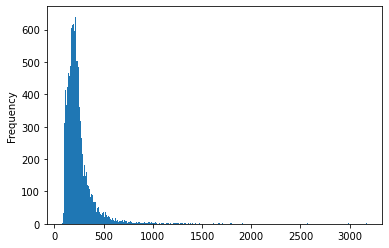

In [ ]:
# 전체 데이터 최종 전처리 후 문서 길이 분포

total_df = total_df[total_df['len'] != 0].reset_index(drop=True)
total_df['len'].plot(kind='hist', bins=300)

In [ ]:
# 토큰중 길이가 1인 토큰 제거

total_df['fined_token'] = total_df['fined_token'].apply(lambda x: list(filter(lambda word: len(word)>1, x)))
total_df

,company_name,long_text,len,fined_text,train_data,short_text,token,fined_token
0,3S,"반도체 웨이퍼캐리어 박스 및 공업용 열량계, 환경시험장치 등의 생산 및 판매를 주력...",211,[반도체 웨이퍼캐리어 박스 및 공업용 열량계 환경시험장치 등의 생산 주력사업으로 영...,반도체 웨이퍼캐리어 박스 및 공업용 열량계 환경시험장치 등의 생산 주력사업으로 영위...,NaN,"[[(반도체, NNG), (웨이퍼, NNG), (캐리어, NNG), (박스, NNG...","[반도체, 웨이퍼, 캐리어, 박스, 공업, 열량계, 환경, 시험, 장치, 생산, 주..."
1,AJ네트웍스,동사는 2013년 12월 지배회사인 舊 아주엘앤에프홀딩스(주)를 합병하여 자회사 등...,246,[지배회사인 아주엘앤에프홀딩스주를 합병하여 자회사 등에 대한 사업 등을 영위하는 지...,지배회사인 아주엘앤에프홀딩스주를 합병하여 자회사 등에 대한 사업 등을 영위하는 지주...,NaN,"[[(지배, NNG), (회사, NNG), (인, VCP+ETM), (아주, MAG...","[지배, 회사, 에프, 홀딩스, 합병, 자회사, 사업, 영위, 지주, 부문, 조직,..."
2,AK홀딩스,"동사는 1970년 10월에 설립되어, 투자사업부문과 화학제품 제조 및 판매부문으로 ...",183,"[설립되어 투자사업부문과 화학제품 제조 인적분할하여 순수지주회사로 전환하였음., 사...",설립되어 투자사업부문과 화학제품 제조 인적분할하여 순수지주회사로 전환하였음. 사업부...,NaN,"[[(설립, NNG), (되, XSV), (어, EC), (투자, NNG), (사업...","[설립, 투자, 사업, 부문, 화학제품, 제조, 분할, 순수, 지주회사, 전환, 사..."
3,APS홀딩스,2017년 4월 지주사 전환을 위해 투자사업 부문의 APS홀딩스(주)(구 에이피시스...,210,[지주사 전환을 위해 투자사업 부문의 APS홀딩스주구 에이피시스템 존속법인와 장비사...,지주사 전환을 위해 투자사업 부문의 APS홀딩스주구 에이피시스템 존속법인와 장비사업...,NaN,"[[(지주사, NNG), (전환, NNG), (을, JKO), (위해, VV+EC)...","[지주사, 전환, 투자, 사업, 부문, aps, 홀딩스, 에이피, 시스템, 존속, ..."
4,AP시스템,"2017년 3월 ASP홀딩스(존속법인, 지주회사)의 디스플레이/반도체 장비 제조 사...",213,[ASP홀딩스존속법인 지주회사의 디스플레이반도체 장비 제조 사업부문이 인적분할되어 ...,ASP홀딩스존속법인 지주회사의 디스플레이반도체 장비 제조 사업부문이 인적분할되어 신...,NaN,"[[(ASP, SL), (홀딩스, NNP), (존속, NNG), (법인, NNG),...","[asp, 홀딩스, 존속, 법인, 지주회사, 디스플레이, 반도체, 장비, 제조, 사..."
...,...,...,...,...,...,...,...,...
10434,포레스트파트너스,포레스트 파트너스는 혁신적인 기업가들과 함께 위대한 기업을...,137,[포레스트 기업가들과 함께 위대한 기업을 만들어가는 열정적인 파트너가 되고자 합니다...,포레스트 기업가들과 함께 위대한 기업을 만들어가는 열정적인 파트너가 되고자 합니다....,“We Make Things Happen”\n,"[[(포레스트, NNP), (기업가, NNG), (들, XSN), (과, JKB),...","[포레스트, 기업가, 기업, 열정, 파트너, 포레스트, 파트, 너스, 자원, 자본,..."
10435,인텔리어스,"(주)인텔리어스는 대화형 인공지능 기술 기업으로, 인공지능...",133,[주 인텔리어스는 대화형 인공지능 기술 기업으로 위한 대화 Conversation맥...,주 인텔리어스는 대화형 인공지능 기술 기업으로 위한 대화 Conversation맥락...,"With AI, Better Human Life\n","[[(주, NNP), (인텔, NNP), (리어스, NNP), (는, JX), (대...","[인텔, 리어스, 대화, 인공지능, 기술, 기업, conversation, 맥락, ..."
10436,Suresoft Technologies Inc.,[소개]Quality in your sw“소프트웨어 설계부터 검증까지” 슈어소프트...,311,[소개 sw소프트웨어 설계부터 검증까지 슈어소프트테크 주 는 설계 구현 시험 검증 ...,소개 sw소프트웨어 설계부터 검증까지 슈어소프트테크 주 는 설계 구현 시험 검증 검...,\n,"[[(소개, NNG), (sw, SL), (소프트웨어, NNG), (설계, NNG)...","[소개, sw, 소프트웨어, 설계, 검증, 슈어, 소프트, 테크, 구현, 시험, 검..."
10437,포인트나인,"""인류 문명은 0.1%의 창의적 인간과,0.9%의 안목있는 사람들에 의해 건설됐으...",169,"[인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다,...",인류 문명은 창의적 의해 건설됐으며나머지 인간은 수동적으로 이를 따라왔을 뿐이다 경...,"온라인커머스를 기반으로 한 인큐베이팅 사업과 패션 사업(브랜드, 솔루션)\n","[[(인류, NNG), (문명, NNG), (은, JX), (창의, NNG), (적...","[인류, 문명, 창의, 건설, 나머지, 인간, 수동, 경제학자, 제레미, 리프킨, ..."


In [ ]:
total_df['train_data'][121]

'철강재의 제조 동작구 동작대로에 본사를 포항과 당진 광양에 공장을 운영하고 있음. 건축용 조립식 빔 반채움 PC 트러스보강재 합성보 하이브리드 합성보 등 다수의 특허를 등록하는 등 안정적 기술력을 확보하고 있음. 당진공장에 조립식 H빔의 리스 제품을 추가하며 데크플레이트 건물 외벽인 커튼월 등의 생산 추진 중. 건축용 조립식 빔 반채움 PC 트러스보강재 합성보 등 주력제품 가운데.'

In [ ]:
total_df.to_pickle('cm_rocket_demoday.pkl')

# Embedding Model Training


TSDAE Learning :
https://www.sbert.net/examples/unsupervised_learning/TSDAE/README.html


In [ ]:
total_df = pd.read_pickle('cm_rocket_demoday.pkl')

In [ ]:
!pip install sentence_transformers

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sentence_transformers import SentenceTransformer, LoggingHandler, InputExample
from sentence_transformers import models, util, datasets, evaluation, losses
from torch.utils.data import DataLoader

In [ ]:
# TSDAE Learning

model_name = 'stsb-xlm-r-multilingual'
model = SentenceTransformer(model_name)
model.max_seq_length = 512
save_path = 'output/final_model2'

train_dataset = datasets.DenoisingAutoEncoderDataset(total_df['train_data'].values)

# DataLoader to batch your data
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Use the denoising auto-encoder loss
train_loss = losses.DenoisingAutoEncoderLoss(model, decoder_name_or_path=model_name, tie_encoder_decoder=True)

# Call the fit method
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=100,
    show_progress_bar=True,
    checkpoint_path=save_path,
    checkpoint_save_steps=len(train_dataloader),
    checkpoint_save_total_limit=100,
)

model.save(save_path)

When tie_encoder_decoder=True, the decoder_name_or_path will be invalid.
Some weights of XLMRobertaForCausalLM were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/sentence-transformers_stsb-xlm-r-multilingual/ and are newly initialized: ['encoder.layer.4.crossattention.self.query.weight', 'encoder.layer.8.crossattention.output.dense.bias', 'encoder.layer.5.crossattention.self.key.weight', 'encoder.layer.8.crossattention.output.LayerNorm.weight', 'encoder.layer.4.crossattention.self.key.weight', 'encoder.layer.6.crossattention.self.query.bias', 'encoder.layer.3.crossattention.self.value.weight', 'encoder.layer.4.crossattention.output.dense.weight', 'encoder.layer.9.crossattention.output.LayerNorm.weight', 'encoder.layer.5.crossattention.self.query.bias', 'encoder.layer.3.crossattention.output.dense.bias', 'encoder.layer.2.crossattention.output.LayerNorm.weight', 'encoder.layer.11.crossattention.output.dense.bias', 'encoder.layer.3.crossattention.se

In [ ]:
iteration = int(len(total_df)/2) + 1
iteration

5220

# Sentence_Embedding

In [ ]:
# training 한 모델 임베딩

from tqdm.notebook import tqdm

def get_embedding(df, model_name):
  model = SentenceTransformer(model_name)
  doc_vec = np.empty((0,model.get_sentence_embedding_dimension()))
  for i in tqdm(range(len(df))):
    # doc_emb = model.encode(df[i]).reshape(1,-1)
    sent_emb = model.encode(df[i])
    doc_emb = np.average(sent_emb, axis=0).reshape(1,-1)
    doc_vec = np.concatenate((doc_vec, doc_emb))
  np.save(model_name+'.npy', doc_vec)

In [ ]:
get_embedding(total_df['train_data'], model_name)

output/final_model2/5220 : start!


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x7f149db40bd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/notebook.py", line 220, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


KeyboardInterrupt: ignored

# Clustering

In [ ]:
# Cluster 결과값에서 불필요한 토큰 발견 후 제거함(선반영된 결과)

total_df = pd.read_pickle('cm_rocket_demoday.pkl')
remove_list = ['영위', '완성', '부문', '본사', '제품', '중국', '사업', 'covid', '설립', '주력', '확산', '업체', '서비스', '가격', '제공', 
               '운영', '시장', '재미', '진행', '스타트업', '프로젝트', '보급', '이용', '습관', '여파' '제공', '플랫', '제공', '사용', 
               '솔루션', '통합', '공공', '공급', '구축', '해결', '회사', '확보', '기능', '침체', '경기', '바탕', '전문', '과점', '경기', '내수', 
               '마음', '소개', '배합', '가운데', '확보', '고객', '미국', '사용', '위축', '분할', '다양', '호조', '대한민국', '활용', '가능', '분야']
total_df['fined_token'] = total_df['fined_token'].apply(lambda x: [word for word in x if word not in remove_list])
total_df.to_pickle('cm_rocket_demoday.pkl')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from collections import Counter
import itertools

In [ ]:
model_name = 'stsb-xlm-r-multilingual'
get_embedding(total_df['fined_text'], model_name)
embeddings = np.load(model_name+'.npy')

agg_model = AgglomerativeClustering(n_clusters=20).fit(embeddings)
pred = agg_model.labels_
total_df['label'] = pred

cal_score = calinski_harabasz_score(embeddings, pred)
sil_score = silhouette_score(embeddings, pred, metric='cosine')
print('cal_score :{0:0.2f} sil_score : {1:0.4f}'.format(cal_score, sil_score))

cal_score :160.93 sil_score : -0.0072


In [ ]:
for i in tqdm(range(1,31)):
  model_name = 'output/final_model2/{}'.format(iteration*i)
  get_embedding(total_df['fined_text'], model_name)
  embeddings = np.load(model_name+'.npy')

  agg_model = AgglomerativeClustering(n_clusters=20).fit(embeddings)
  pred = agg_model.labels_
  total_df['label'] = pred

  cal_score = calinski_harabasz_score(embeddings, pred)
  sil_score = silhouette_score(embeddings, pred, metric='cosine')
  print('iteration  : {0} cal_score :{1:0.2f} sil_score : {2:0.4f}'.format(i, cal_score, sil_score))


iteration  : 1 cal_score :520.16 sil_score : 0.0727



iteration  : 2 cal_score :319.82 sil_score : 0.0639



iteration  : 3 cal_score :208.40 sil_score : 0.0699



iteration  : 4 cal_score :149.75 sil_score : 0.0468



iteration  : 5 cal_score :132.88 sil_score : 0.0403



iteration  : 6 cal_score :124.05 sil_score : 0.0384



iteration  : 7 cal_score :121.87 sil_score : 0.0365



iteration  : 8 cal_score :111.93 sil_score : 0.0377



iteration  : 9 cal_score :109.64 sil_score : 0.0389



iteration  : 10 cal_score :111.85 sil_score : 0.0338



iteration  : 11 cal_score :101.50 sil_score : 0.0349



iteration  : 12 cal_score :99.78 sil_score : 0.0405



iteration  : 13 cal_score :96.74 sil_score : 0.0333



iteration  : 14 cal_score :96.67 sil_score : 0.0367



iteration  : 15 cal_score :92.10 sil_score : 0.0353



iteration  : 16 cal_score :97.22 sil_score : 0.0480



iteration  : 17 cal_score :91.31 sil_score : 0.0382



iteration  : 18 cal_score :93.23 sil_score : 0.0447



iteration  : 19 cal_score :94.51 sil_score : 0.0393



iteration  : 20 cal_score :93.67 sil_score : 0.0309



iteration  : 21 cal_score :94.38 sil_score : 0.0302


KeyboardInterrupt: ignored

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 1.1MB 9.3MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=c84b858bbc72487577259190cb7a402a3335b8a770107851850f723f0144cc34
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.4-cp37-none-any.whl size=52374 sha256=a93037fef65273f7e06e8fa769143d67e501ca2d334f00a9a6639d2f32ec8afd
  Stored in directory: /root/.cache/pip/wheels/42/4b/8c/f6f119c67cf6583bb192431fa8f7278cf95e5b943055077d94
Successfully built umap-learn pynndescent


In [ ]:
# TSDAE traing 에폭별 Silhouette Score & Calinski Harabasz Score
# Epoch 70으로 결정


from umap import UMAP

for i in tqdm(range(1,22,5)):
  model_name = 'output/final_model2/{}'.format(iteration*i)
  get_embedding(total_df['fined_text'], model_name)
  embeddings = np.load(model_name+'.npy')
  umap = UMAP(n_neighbors=5,
            n_components= 50,
            metric='cosine')
  embeddings = umap.fit_transform(embeddings)

  agg_model = AgglomerativeClustering(n_clusters=20).fit(embeddings)
  pred = agg_model.labels_
  total_df['label'] = pred

  cal_score = calinski_harabasz_score(embeddings, pred)
  sil_score = silhouette_score(embeddings, pred, metric='cosine')
  print('iteration  : {0} cal_score :{1:0.2f} sil_score : {2:0.4f}'.format(i*10, cal_score, sil_score))


iteration  : 10 cal_score :9546.19 sil_score : 0.4074


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm

In [ ]:
!pip install parmap

In [ ]:
# Umap 차원 축소 dimension 별 Silhouette Score plot
# Umap SGD 과정이므로 매번 조금씩 결과값이 달라짐
# 한 차원당 50회 반복 -> 50회 Silhouette Score 평균으로 plot

import multiprocessing as mp
from multiprocessing import Pool, Manager
from umap import UMAP
import parmap
import os

manager = Manager()
sil_score_list = manager.dict()
num_cores = 20
n_dim_list = range(1,101)

def dim_reduction(n_dim, sil_score_list):
  
  sil_score = 0
  n_iters = 50
  for i in range(0, n_iters):
    if i % 5 == 0:
      print('dim :{} , {}% 완료'.format(n_dim, int((i/n_iters)*100)))
    umap = UMAP(n_neighbors=5, n_components= n_dim, metric='cosine')
    umap_embeddings = umap.fit_transform(embeddings)
    agg_model = AgglomerativeClustering(n_clusters=20).fit(umap_embeddings)
    pred = agg_model.labels_
    sil_score += silhouette_score(umap_embeddings, pred, metric="cosine")

  sil_score = sil_score/n_iters
  sil_score_list[n_dim] = sil_score
  
  print('dim: {} 처리완료'.format(n_dim))
  
model_name = 'output/final_model2/{}'.format(iteration*1)
embeddings = np.load(model_name+'.npy')
sil_score_list = parmap.map(dim_reduction, n_dim_list, sil_score_list, pm_processes=num_cores)

dim :3 , 0% 완료
dim :5 , 0% 완료
dim :1 , 0% 완료
dim :7 , 0% 완료
dim :9 , 0% 완료
dim :11 , 0% 완료
dim :13 , 0% 완료
dim :15 , 0% 완료
dim :17 , 0% 완료
dim :21 , 0% 완료
dim :19 , 0% 완료
dim :23 , 0% 완료
dim :25 , 0% 완료
dim :27 , 0% 완료
dim :29 , 0% 완료
dim :31 , 0% 완료
dim :35 , 0% 완료
dim :33 , 0% 완료
dim :37 , 0% 완료
dim :39 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TB

dim :41 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :43 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :1 , 10% 완료
dim :3 , 10% 완료
dim :5 , 10% 완료
dim :9 , 10% 완료
dim :7 , 10% 완료
dim :11 , 10% 완료
dim :13 , 10% 완료
dim :15 , 10% 완료
dim :17 , 10% 완료
dim :21 , 10% 완료
dim :19 , 10% 완료
dim :23 , 10% 완료
dim :25 , 10% 완료
dim :33 , 10% 완료
dim :29 , 10% 완료
dim :31 , 10% 완료
dim :37 , 10% 완료
dim :39 , 10% 완료
dim :41 , 10% 완료
dim :43 , 10% 완료
dim :1 , 20% 완료
dim :3 , 20% 완료
dim :5 , 20% 완료
dim :9 , 20% 완료
dim :7 , 20% 완료
dim :11 , 20% 완료
dim :13 , 20% 완료
dim :15 , 20% 완료
dim :21 , 20% 완료
dim :19 , 20% 완료
dim :17 , 20% 완료
dim :23 , 20% 완료
dim :25 , 20% 완료
dim :29 , 20% 완료
dim :33 , 20% 완료
dim :31 , 20% 완료
dim :37 , 20% 완료
dim :39 , 20% 완료
dim :1 , 30% 완료
dim :41 , 20% 완료
dim :3 , 30% 완료
dim :43 , 20% 완료
dim :5 , 30% 완료
dim :7 , 30% 완료
dim :9 , 30% 완료
dim :11 , 30% 완료
dim :13 , 30% 완료
dim :15 , 30% 완료
dim :19 , 30% 완료
dim :21 , 30% 완료
dim :17 , 30% 완료
dim :23 , 30% 완료
dim :25 , 30% 완료
dim :1 , 40% 완료
dim :29 , 30% 완료
dim :33 , 30% 완료
dim :31 , 30% 완료
dim :37 , 30% 완료
dim :39 , 30% 완료
dim :3 , 40% 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :24 , 10% 완료
dim: 39 처리완료
dim :40 , 0% 완료
dim :8 , 20% 완료
dim :26 , 10% 완료
dim :2 , 40% 완료
dim :12 , 20% 완료
dim :47 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :4 , 30% 완료
dim :16 , 20% 완료
dim :14 , 20% 완료
dim: 41 처리완료
dim :42 , 0% 완료
dim :20 , 20% 완료
dim :49 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :51 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim: 43 처리완료
dim :44 , 0% 완료
dim :18 , 20% 완료
dim :30 , 10% 완료
dim :34 , 10% 완료
dim :22 , 20% 완료
dim :32 , 10% 완료
dim :38 , 10% 완료
dim :8 , 30% 완료
dim :2 , 50% 완료
dim :24 , 20% 완료
dim :12 , 30% 완료
dim :26 , 20% 완료
dim :40 , 10% 완료
dim :45 , 10% 완료
dim :14 , 30% 완료
dim :47 , 10% 완료
dim :20 , 30% 완료
dim :42 , 10% 완료
dim :18 , 30% 완료
dim :22 , 30% 완료
dim :34 , 20% 완료
dim :30 , 20% 완료
dim :32 , 20% 완료
dim :44 , 10% 완료
dim :2 , 60% 완료
dim :8 , 40% 완료
dim :51 , 10% 완료
dim :49 , 10% 완료
dim :38 , 20% 완료
dim :12 , 40% 완료
dim :24 , 30% 완료
dim :26 , 30% 완료
dim :40 , 20% 완료
dim :14 , 40% 완료
dim :45 , 20% 완료
dim :20 , 40% 완료
dim :18 , 40% 완료
dim :42 , 20% 완료
dim :22 , 40% 완료
dim :47 , 20% 완료
dim :2 , 70% 완료
dim :30 , 30% 완료
dim :34 , 30% 완료
dim :32 , 30% 완료
dim :8 , 50% 완료
dim :44 , 20% 완료
dim :53 , 0% 완료
dim :55 , 0% 완료
dim :57 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :59 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :12 , 50% 완료
dim :24 , 40% 완료
dim :51 , 20% 완료
dim :49 , 20% 완료
dim :38 , 30% 완료
dim :26 , 40% 완료
dim :40 , 30% 완료
dim :18 , 50% 완료
dim :45 , 30% 완료
dim :22 , 50% 완료
dim :61 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :63 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :65 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :67 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :69 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :71 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :42 , 30% 완료
dim :34 , 40% 완료
dim :47 , 30% 완료
dim :12 , 60% 완료
dim :44 , 30% 완료
dim :51 , 30% 완료
dim :49 , 30% 완료
dim :53 , 10% 완료
dim :57 , 10% 완료
dim :55 , 10% 완료
dim :59 , 10% 완료
dim :40 , 40% 완료
dim :22 , 60% 완료
dim :45 , 40% 완료
dim :12 , 70% 완료
dim :34 , 50% 완료
dim :42 , 40% 완료
dim :47 , 40% 완료
dim :44 , 40% 완료
dim :65 , 10% 완료
dim :61 , 10% 완료
dim :63 , 10% 완료
dim :67 , 10% 완료
dim :69 , 10% 완료
dim :71 , 10% 완료
dim :51 , 40% 완료
dim :49 , 40% 완료
dim :53 , 20% 완료
dim :40 , 50% 완료
dim :57 , 20% 완료
dim :55 , 20% 완료
dim :59 , 20% 완료
dim :22 , 70% 완료
dim :12 , 80% 완료
dim :45 , 50% 완료
dim :34 , 60% 완료
dim :42 , 50% 완료
dim :47 , 50% 완료
dim :44 , 50% 완료
dim :65 , 20% 완료
dim :61 , 20% 완료
dim :51 , 50% 완료
dim :63 , 20% 완료
dim :67 , 20% 완료
dim :69 , 20% 완료
dim :49 , 50% 완료
dim :71 , 20% 완료
dim :40 , 60% 완료
dim :53 , 30% 완료
dim :57 , 30% 완료
dim :55 , 30% 완료
dim :22 , 80% 완료
dim :59 , 30% 완료
dim :12 , 90% 완료
dim :34 , 70% 완료
dim :45 , 60% 완료
dim :42 , 60% 완료
dim :47 , 60% 완료
dim :44 , 60% 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :79 , 10% 완료
dim: 49 처리완료
dim :50 , 0% 완료
dim :53 , 80% 완료
dim :57 , 80% 완료
dim :61 , 70% 완료
dim :65 , 70% 완료
dim :75 , 30% 완료
dim :55 , 80% 완료
dim :67 , 70% 완료
dim :63 , 70% 완료
dim :69 , 70% 완료
dim :59 , 80% 완료
dim :46 , 10% 완료
dim :77 , 20% 완료
dim :71 , 70% 완료
dim :81 , 10% 완료
dim :48 , 10% 완료
dim :83 , 10% 완료
dim :52 , 10% 완료
dim :50 , 10% 완료
dim :79 , 20% 완료
dim :53 , 90% 완료
dim :57 , 90% 완료
dim :85 , 10% 완료
dim :61 , 80% 완료
dim :55 , 90% 완료
dim :65 , 80% 완료
dim :67 , 80% 완료
dim :75 , 40% 완료
dim :63 , 80% 완료
dim :46 , 20% 완료
dim :59 , 90% 완료
dim :69 , 80% 완료
dim :77 , 30% 완료
dim :71 , 80% 완료
dim :81 , 20% 완료
dim :48 , 20% 완료
dim :52 , 20% 완료
dim :50 , 20% 완료
dim :83 , 20% 완료
dim: 53 처리완료
dim :54 , 0% 완료
dim: 57 처리완료
dim :58 , 0% 완료
dim :79 , 30% 완료
dim: 55 처리완료
dim :56 , 0% 완료
dim :61 , 90% 완료
dim :65 , 90% 완료
dim :67 , 90% 완료
dim :46 , 30% 완료
dim :85 , 20% 완료
dim :63 , 90% 완료
dim :75 , 50% 완료
dim: 59 처리완료
dim :60 , 0% 완료
dim :69 , 90% 완료
dim :77 , 40% 완료
dim :71 , 90% 완료
dim :

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :83 , 30% 완료
dim :54 , 10% 완료
dim :58 , 10% 완료
dim :56 , 10% 완료
dim: 61 처리완료
dim :62 , 0% 완료
dim :46 , 40% 완료
dim: 65 처리완료
dim :66 , 0% 완료
dim :79 , 40% 완료
dim: 67 처리완료
dim :68 , 0% 완료
dim: 63 처리완료
dim :64 , 0% 완료
dim :60 , 10% 완료
dim :85 , 30% 완료
dim: 69 처리완료
dim :70 , 0% 완료
dim :48 , 40% 완료
dim: 71 처리완료
dim :72 , 0% 완료
dim :77 , 50% 완료
dim :52 , 40% 완료
dim :50 , 40% 완료
dim :81 , 40% 완료
dim :54 , 20% 완료
dim :83 , 40% 완료
dim :58 , 20% 완료
dim :56 , 20% 완료
dim :46 , 50% 완료
dim :87 , 10% 완료
dim :62 , 10% 완료
dim :66 , 10% 완료
dim :68 , 10% 완료
dim :64 , 10% 완료
dim :79 , 50% 완료
dim :60 , 20% 완료
dim :85 , 40% 완료
dim :48 , 50% 완료
dim :70 , 10% 완료
dim :52 , 50% 완료
dim :72 , 10% 완료
dim :50 , 50% 완료
dim :77 , 60% 완료
dim :81 , 50% 완료
dim :54 , 30% 완료
dim :58 , 30% 완료
dim :56 , 30% 완료
dim :89 , 0% 완료
dim :91 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :46 , 60% 완료
dim :83 , 50% 완료
dim :62 , 20% 완료
dim :66 , 20% 완료
dim :87 , 20% 완료
dim :68 , 20% 완료
dim :64 , 20% 완료
dim :60 , 30% 완료
dim :48 , 60% 완료
dim :79 , 60% 완료
dim :70 , 20% 완료
dim :52 , 60% 완료
dim :50 , 60% 완료
dim :85 , 50% 완료
dim :72 , 20% 완료
dim :54 , 40% 완료
dim :56 , 40% 완료
dim :58 , 40% 완료
dim :46 , 70% 완료
dim :83 , 60% 완료
dim :62 , 30% 완료
dim :66 , 30% 완료
dim :64 , 30% 완료
dim :48 , 70% 완료
dim :89 , 10% 완료
dim :68 , 30% 완료
dim :60 , 40% 완료
dim :91 , 10% 완료
dim :87 , 30% 완료
dim :52 , 70% 완료
dim :50 , 70% 완료
dim :79 , 70% 완료
dim :70 , 30% 완료
dim :72 , 30% 완료
dim :85 , 60% 완료
dim :54 , 50% 완료
dim :46 , 80% 완료
dim :56 , 50% 완료
dim :58 , 50% 완료
dim :62 , 40% 완료
dim :66 , 40% 완료
dim :48 , 80% 완료
dim :83 , 70% 완료
dim :64 , 40% 완료
dim :60 , 50% 완료
dim :68 , 40% 완료
dim :52 , 80% 완료
dim :50 , 80% 완료
dim :89 , 20% 완료
dim :91 , 20% 완료
dim :87 , 40% 완료
dim :70 , 40% 완료
dim :79 , 80% 완료
dim :72 , 40% 완료
dim :85 , 70% 완료
dim :54 , 60% 완료
dim :46 , 90% 완료
dim :93 , 0% 완료


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


dim :56 , 60% 완료
dim :58 , 60% 완료
dim :48 , 90% 완료
dim :66 , 50% 완료
dim :62 , 50% 완료
dim :64 , 50% 완료
dim :60 , 60% 완료
dim :52 , 90% 완료
dim :50 , 90% 완료
dim :68 , 50% 완료
dim :89 , 30% 완료
dim :70 , 50% 완료
dim :91 , 30% 완료
dim :87 , 50% 완료
dim :79 , 90% 완료
dim :72 , 50% 완료
dim :54 , 70% 완료
dim: 46 처리완료
dim :95 , 0% 완료
dim :85 , 80% 완료
dim :56 , 70% 완료
dim :58 , 70% 완료
dim: 48 처리완료
dim :97 , 0% 완료
dim :93 , 10% 완료
dim :66 , 60% 완료
dim :62 , 60% 완료
dim :64 , 60% 완료
dim: 50 처리완료
dim :99 , 0% 완료
dim: 52 처리완료
dim :60 , 70% 완료
dim :68 , 60% 완료
dim :70 , 60% 완료
dim :89 , 40% 완료
dim :54 , 80% 완료
dim :87 , 60% 완료
dim :91 , 40% 완료
dim :72 , 60% 완료
dim: 79 처리완료
dim :80 , 0% 완료
dim :56 , 80% 완료
dim :58 , 80% 완료
dim :85 , 90% 완료
dim :66 , 70% 완료
dim :62 , 70% 완료
dim :97 , 10% 완료
dim :64 , 70% 완료
dim :60 , 80% 완료
dim :93 , 20% 완료
dim :68 , 70% 완료
dim :99 , 10% 완료
dim :70 , 70% 완료
dim :54 , 90% 완료
dim :56 , 90% 완료
dim :89 , 50% 완료
dim :72 , 70% 완료
dim :80 , 10% 완료
dim :87 , 70% 완료
dim :91 , 50% 완료
dim 

KeyboardInterrupt: ignored

In [ ]:
dict(sil_score_list)

FileNotFoundError: ignored

In [ ]:
temp_dict = dict(sil_score_list[0])

with open('sil_score.pkl', 'wb') as f:
  pickle.dump(temp_dict, f)



K = []
values = []
for key, val in sorted(temp_dict.items(), key=lambda x: x[0]):
  K.append(key)
  values.append(val)

plt.plot(K, values, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
from collections import OrderedDict
sil_score_list = OrderedDict()
for key, val in sorted(temp_dict.items(), key=lambda x: x[1], reverse=True):
  sil_score_list[key] = val
sil_score_list

OrderedDict([(17, 0.5458218085765839),
             (15, 0.5417084902524948),
             (29, 0.5389836567640305),
             (19, 0.5386912417411804),
             (14, 0.5384090971946717),
             (13, 0.5365960109233856),
             (22, 0.5364997464418412),
             (33, 0.5356122606992721),
             (21, 0.5354999101161957),
             (46, 0.5352815556526184),
             (23, 0.5344016385078431),
             (25, 0.5343251234292984),
             (12, 0.5343233233690262),
             (24, 0.5338881182670593),
             (28, 0.5336327826976777),
             (31, 0.5335858935117721),
             (35, 0.5335357683897018),
             (39, 0.5334109532833099),
             (40, 0.5334109532833099),
             (18, 0.5332968550920486),
             (26, 0.5332374948263169),
             (27, 0.5325674891471863),
             (20, 0.5323895078897476),
             (10, 0.5315418046712875),
             (43, 0.5306641209125519),
             (36, 0.53054

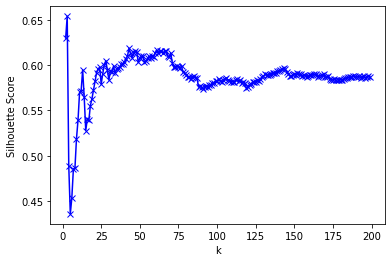

In [ ]:
# 차원 수 17로 결정
# Cluster 개수 별 Silhouette Plot
from tqdm.notebook import tqdm

K = range(2,200)
umap = UMAP(n_neighbors=5, n_components=17, metric='cosine')
umap_embeddings = umap.fit_transform(embeddings)
cls_score = []
for k in tqdm(K):
  agg_model = AgglomerativeClustering(n_clusters=k).fit(umap_embeddings)
  pred = agg_model.labels_
  sil_score = silhouette_score(umap_embeddings, pred, metric="cosine")
  cls_score.append(sil_score)
plt.plot(K, cls_score, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
sil_rank = np.argsort(cls_score)[::-1]+2
sil_rank

array([  3,   2,  43,  61,  67,  63,  64,  47,  66,  48,  60,  65,  46,
        70,  44,  62,  58,  68,  51,  42,  52,  56,  59,  69,  57,  45,
        50,  55,  41,  28,  54,  53,  40,  49,  71,  38,  39,  27,  74,
        33,  77,  73,  37,  75,  72,  24,  76,  36, 143,  23, 142, 144,
        35,  13, 141,  29,  31, 140, 139,  32, 145,  78,  79, 136,  22,
       152, 137,  34, 138, 135,  26, 169, 146, 150, 154, 163, 153, 164,
       131,  80, 161, 134, 132, 162, 160, 149, 168, 133, 151, 156, 167,
       195, 157, 172, 159, 155, 166, 147,  85, 130, 188, 192, 148, 198,
       189, 194, 191,  82,  84, 158, 197, 199, 165, 187, 170,  81, 190,
       185, 129, 171, 186, 193,  86,  87, 196, 184, 106, 183,  83, 182,
       105, 101, 173, 113, 128, 176, 180, 178, 175, 174, 181,  30, 179,
       107, 112, 104, 126, 177, 115, 108, 102, 127,  99, 100, 114,  21,
       111, 109, 110, 124, 125, 123, 103, 117,  98,  97, 116, 118, 122,
        25, 121,  96,  95,  93,  89, 120,  92,  88,  94,  90, 11

In [ ]:
# 5 이상인 값중 가장 score 높은 Dimension인 43이 최적의 cluster 개수

model_name = 'output/final_model/{}'.format(iteration*70)
embeddings = np.load(model_name+'.npy')
umap = UMAP(n_neighbors=5, n_components=17, metric='cosine', n_epochs=10000)
umap_embeddings = umap.fit_transform(embeddings)

agg_model = AgglomerativeClustering(n_clusters=43).fit(umap_embeddings)
pred = agg_model.labels_
sil_score = silhouette_score(umap_embeddings, pred, metric="cosine")
sil_score

NameError: ignored

In [ ]:
with open('umap_dim.pkl', 'wb') as f:
  pickle.dump(umap, f)

np.save('sbert_umap_vec.npy',umap_embeddings)

In [ ]:
def identify_tokenizer(text):
  return text


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, tokenizer=identify_tokenizer, lowercase=False).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(doc_per_cls.label)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['label'])
                     .fined_token
                     .count()
                     .reset_index()
                     .rename({"label": "Topic", "fined_token": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In [ ]:
total_df['label'] = pred

cal_score = calinski_harabasz_score(umap_embeddings, pred)
sil_score = silhouette_score(umap_embeddings, pred, metric='cosine')
print('cal_score :{0:0.4f} sil_score : {1:0.4f}'.format(cal_score, sil_score))

doc_per_cls = total_df.groupby(['label'], as_index=False).agg({'fined_text': 'sum','fined_token': 'sum'})
tf_idf, count = c_tf_idf(doc_per_cls.fined_token.values, m=len(total_df))
top_n_words = extract_top_n_words_per_topic(tf_idf, count, doc_per_cls, n=20)
topic_sizes = extract_topic_sizes(total_df)

for key, value in top_n_words.items():
  value = [word[0] for word in value]
  print(key, ':', value)

cal_score :6694.3639 sil_score : 0.5901


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0 : ['로봇', '에너지', '기술', '시스템', '스마트', '드론', '산업', '제어', '자동', '로보', '기업', '내비게이션', '제조', '설비', '설계', '생산', '위성', '전력', 'iot', '데이터']
1 : ['음악', '콘텐츠', '방송', '제작', '영화', '미디어', '엔터', '드라마', '공연', 'tv', '아티스트', '뮤직', '광고', '영상', '매니지먼트', '유통', '오디오', '뮤지션', '채널', '음원']
2 : ['의료', '진단', '환자', '병원', '케어', '헬스', '기기', '분석', '보험', '건강', '기술', '바이오', '치료', '질환', '연구', '검사', '데이터', '유전체', '유전자', '인공지능']
3 : ['웹툰', '콘텐츠', '전자책', '크리에이터', '제작', '캐릭터', '소설', '컨텐츠', '출판사', '언서', '출판', '미디어', '애니메이션', '만화', '도서', '작가', '스토리', '브랜드', '활동', '독자']
4 : ['it', '기업', '기술', '시스템', '소프트웨어', '클라우드', '환경', '데이터', '컨설팅', '선도', '기술력', '소프트', '발전', '비즈니스', '인프라', '경쟁력', '모바일', '미래', 'iot', '품질']
5 : ['자동차', '부품', '현대', '선박', '생산', '기계', '엔진', '제조', '공장', '셧다운', '납품', '운송', '산업', '건설', '제조업', '방산', '수주', '조선', '밸브', '물류']
6 : ['건축', '토목', '공사', '건설', '제조', '시멘트', '철강', '레미콘', '공장', '생산', '골판지', '스테인리스', '강관', '강판', '스틸', '포스코', '선재', '시공', '냉연', '주택']
7 : ['의약품', '치료제', '화장품', '바이오', '제조', '신약', '임상', '원료', '식품'

In [ ]:
# 의미 없는 클러스터 22, 26, 38 제거 (채용관련 설명, 기업 비전 설명 등 기업의 사업 설명과 상관 없는 데이터)

drop_list = [22, 26, 38]
drop_index = None
length = 0
for ind in drop_list:
  temp = total_df.loc[total_df['label'] == ind].index
  if drop_index is None:
    drop_index = temp
  else: 
    drop_index = drop_index.append(temp)
  length += len(temp)
print(length)

851


In [ ]:
# 정제된 데이터로 다시 Clustering
tr_index = total_df.drop(drop_index, axis=0).index
fined_umap = umap_embeddings[tr_index]

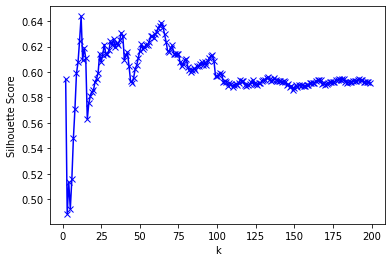

In [ ]:
# Cluster 별 Score plot

K = range(2,200)
cls_score = []
for k in tqdm(K):
  agg_model = AgglomerativeClustering(n_clusters=k).fit(fined_umap)
  pred = agg_model.labels_
  sil_score = silhouette_score(fined_umap, pred, metric="cosine")
  cls_score.append(sil_score)
plt.plot(K, cls_score, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
np.argsort(cls_score)[::-1]+2

array([ 12,  64,  63,  65,  62,  61,  38,  60,  66,  58,  39,  57,  59,
        33,  37,  11,  31,  67,  56,  35,  51,  27,  36,  54,  55,  32,
        71,  34,  53,  70,  14,  52,  30,  68,  50,  69,  42,  72,  75,
        73,  24,  28,  29,  74,  26,  41,  97,  96,  49,  95,  15,  80,
        40,  13,  79,  98,  94,  92,  76,  90,  25,  10,  89,  78,  91,
        48,  93,  77,  87,  43,  88,  81,  85,  47,  86,  84,  82,  83,
        23, 102,   9, 103, 101,  99, 100, 133,  46, 132, 137, 181, 134,
       182,  22,   2, 192, 179, 130, 138, 178, 123, 167, 165, 115, 136,
       177, 194, 180, 166, 191, 131, 193, 190, 188, 143, 116,  44, 139,
       129, 117, 189, 140, 135, 141, 164, 105, 183, 106, 186, 104, 197,
       174,  21, 173, 195, 198, 196, 122, 185, 187, 142, 175, 144, 176,
        45, 199, 163, 172, 162, 184, 161, 108, 128, 169, 160, 127, 114,
       112, 171, 168, 125, 124, 109, 121, 146, 118, 170, 155, 126, 158,
       120, 159, 153, 113, 111, 151, 145, 107, 119, 154, 148, 15

In [ ]:
fined_df = total_df.drop(drop_index).reset_index(drop=True)

In [ ]:
# 클러스터 38로 확인

agg_model = AgglomerativeClustering(n_clusters=38).fit(fined_umap)
pred = agg_model.labels_
sil_score = silhouette_score(fined_umap, pred, metric="cosine")
cls_score.append(sil_score)

In [ ]:
fined_df['label'] = pred

cal_score = calinski_harabasz_score(fined_umap, pred)
sil_score = silhouette_score(fined_umap, pred, metric='cosine')
print('cal_score :{0:0.4f} sil_score : {1:0.4f}'.format(cal_score, sil_score))

doc_per_cls = fined_df.groupby(['label'], as_index=False).agg({'fined_text': 'sum','fined_token': 'sum'})
tf_idf, count = c_tf_idf(doc_per_cls.fined_token.values, m=len(fined_df))
top_n_words = extract_top_n_words_per_topic(tf_idf, count, doc_per_cls, n=20)
topic_sizes = extract_topic_sizes(fined_df)

for key, value in top_n_words.items():
  value = [word[0] for word in value]
  print(key, ':', value)

cal_score :6784.7826 sil_score : 0.6307


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0 : ['식품', '커피', '푸드', '음식', '유통', '소비자', '건강', '농업', '가공', '배달', '사료', '외식', '브랜드', '온라인', '생산', '카페', '매장', '주문', '음료', '맛집']
1 : ['음악', '콘텐츠', '방송', '제작', '영화', '미디어', '엔터', '드라마', '공연', 'tv', '아티스트', '뮤직', '광고', '매니지먼트', '영상', '유통', '오디오', '뮤지션', '채널', '음원']
2 : ['마케팅', '광고', '디자인', '미디어', '모바일', '기업', '브랜드', '디지털', '전략', '제작', '크리에이티브', '컨설팅', '커뮤니케이션', '애드', '온라인', '광고주', '비즈니스', '소셜', '소비자', '홍보']
3 : ['교육', '학습', '학생', '영어', '에듀', '학원', '학교', '강의', '콘텐츠', '온라인', '코딩', '수학', '언어', '공부', '러닝', '기업', '지식', '수업', '테크', '선생']
4 : ['기업', 'it', '기술', '시스템', '소프트웨어', '클라우드', '환경', '데이터', '컨설팅', '선도', '기술력', '소프트', '비즈니스', '발전', '인프라', '미래', '모바일', 'iot', '경쟁력', '최선']
5 : ['로봇', '에너지', '기술', '시스템', '스마트', '드론', '산업', '제어', '자동', '로보', '기업', '내비게이션', '설계', '설비', '제조', '생산', '위성', '전력', 'iot', '소프트웨어']
6 : ['블록체인', '결제', '화폐', '암호', '거래소', '카드', '코인', '거래', '비트코인', '금융', '페이', '가맹점', '기술', '핀테크', '신용', '자산', '시스템', '모바일', '기업', 'ico']
7 : ['웹툰', '콘텐츠', '전자책', '크리에이터', '제작', '캐릭터', '소설', '

In [ ]:
fined_df.to_pickle('fined_cm_rocket_demoday.pkl')
np.save('fined_sbert_umap_vec.npy', fined_umap)

# 최종 결과

In [ ]:
!pip install umap-learn

In [ ]:
with open('umap_dim.pkl','rb') as f:
  umap = pickle.load(f)

total_df = pd.read_pickle('fined_cm_rocket_demoday.pkl')
umap_embeddings = np.load('fined_sbert_umap_vec.npy')

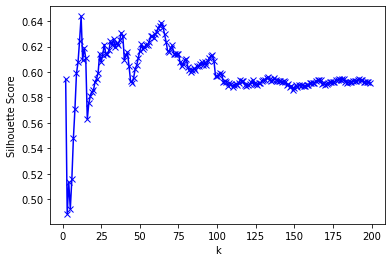

In [ ]:
# Cluster 별 Score plot

K = range(2,200)
cls_score = []
for k in tqdm(K):
  agg_model = AgglomerativeClustering(n_clusters=k).fit(umap_embeddings)
  pred = agg_model.labels_
  sil_score = silhouette_score(fined_umap, pred, metric="cosine")
  cls_score.append(sil_score)
plt.plot(K, cls_score, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
np.argsort(cls_score)[::-1]+2

array([ 12,  64,  63,  65,  62,  61,  38,  60,  66,  58,  39,  57,  59,
        33,  37,  11,  31,  67,  56,  35,  51,  27,  36,  54,  55,  32,
        71,  34,  53,  70,  14,  52,  30,  68,  50,  69,  42,  72,  75,
        73,  24,  28,  29,  74,  26,  41,  97,  96,  49,  95,  15,  80,
        40,  13,  79,  98,  94,  92,  76,  90,  25,  10,  89,  78,  91,
        48,  93,  77,  87,  43,  88,  81,  85,  47,  86,  84,  82,  83,
        23, 102,   9, 103, 101,  99, 100, 133,  46, 132, 137, 181, 134,
       182,  22,   2, 192, 179, 130, 138, 178, 123, 167, 165, 115, 136,
       177, 194, 180, 166, 191, 131, 193, 190, 188, 143, 116,  44, 139,
       129, 117, 189, 140, 135, 141, 164, 105, 183, 106, 186, 104, 197,
       174,  21, 173, 195, 198, 196, 122, 185, 187, 142, 175, 144, 176,
        45, 199, 163, 172, 162, 184, 161, 108, 128, 169, 160, 127, 114,
       112, 171, 168, 125, 124, 109, 121, 146, 118, 170, 155, 126, 158,
       120, 159, 153, 113, 111, 151, 145, 107, 119, 154, 148, 15

In [ ]:
# Level 1: 12 Level 2 : 38
agg_model = AgglomerativeClustering(n_clusters=12).fit(umap_embeddings)
pred = agg_model.labels_
total_df['label_1'] = pred

agg_model = AgglomerativeClustering(n_clusters=38).fit(umap_embeddings)
pred = agg_model.labels_
total_df['label_2'] = pred

In [ ]:
temp = umap.transform()

UMAP(a=None, angular_rp_forest=True, b=None, dens_frac=0.0, dens_lambda=0.0,
     dens_var_shift=0.1, densmap=False, disconnection_distance=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='cosine', metric_kwds=None,
     min_dist=0.1, n_components=17, n_epochs=10000, n_jobs=-1, n_neighbors=5,
     negative_sample_rate=5, output_dens=False, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, ...)

In [ ]:
umap_embeddings.shape

(9588, 17)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix
                              

In [ ]:
agg_model.labels_

array([33, 11, 18, ...,  4, 24, 22])

In [ ]:
from scipy.cluster.hierarchy import linkage
link = linkage(umap_embeddings, method='ward')
dend = dendrogram(link)

Error in callback <function flush_figures at 0x7ff08f0e2d40> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
agg_model.children_[1]

array([5734, 8149])

In [ ]:
total_df.iloc[agg_model.children_[1], :]

,company_name,long_text,len,fined_text,train_data,short_text,token,fined_token,label,label_1,label_2
5734,캐스팅보트 솔루션,안녕하세요.블록체인 투표시스템 스타트업 '캐스팅보트 솔루션...,124,"[투표시스템 스타트업 캐스팅보트 솔루션 입니다., 저희는 블록체인 투표시스템을 공공...",투표시스템 스타트업 캐스팅보트 솔루션 입니다. 저희는 블록체인 투표시스템을 공공 선...,블록체인 투표 시스템 스타트업에서 함께 폭풍성장할 가족을 구합니다 ^^\n,"[[(투표, NNG), (시스템, NNG), (스타트업, NNG), (캐스팅, NN...","[투표, 시스템, 캐스팅, 보트, 블록체인, 투표, 시스템, 선거, 적용, 엔터, ...",35,2,22
8149,보트러스트,VoTrust는 블록체인에 기반하여 투명성 있고 공정한 전...,113,"[VoTrust는 투명성 있고 공정한 전자투표 제공하는 서비스 플랫폼입니다., 학교...",VoTrust는 투명성 있고 공정한 전자투표 제공하는 서비스 플랫폼입니다. 학교에서...,블록체인 기반 투표/가치평가 플랫폼\n,"[[(VoTrust, SL), (는, JX), (투명, NNG), (성, XSN),...","[votrust, 투명, 공정, 전자, 투표, 학교, 정책, 투표, 여론, 조사, ...",35,2,22


In [ ]:
temp = total_df.groupby('label_1')['label_2'].value_counts().to_frame()
temp = temp.rename(columns={'label_2': 'counts'})
temp

counts
label_1 label_2        
0       2           725
        1           421
        24          337
        7           186
        32          152
        8           129
        35          122
1       12          455
        14          271
        20           83
2       3           433
        28          179
        34          135
        22           69
3       9           325
        11          289
        33          257
        15          206
        25          199
        36           65
4       4           624
        5           320
        19          212
        26           73
5       6           261
        27          233
        37           61
6       0           557
7       13          381
        29           94
8       18          282
        16          265
        30           19
9       17          339
        10          241
        31          209
10      21          271
11      23          108

In [ ]:
def identify_tokenizer(text):
  return text


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, tokenizer=identify_tokenizer, lowercase=False).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, df,n=20):
    words = count.get_feature_names()
    labels = list(df.label)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['label'])
                     .fined_token
                     .count()
                     .reset_index()
                     .rename({"label": "Topic", "fined_token": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

def get_cluster_words(df, X, cluster_num):
  agg_model = AgglomerativeClustering(n_clusters=cluster_num).fit(X)
  pred = agg_model.labels_
  df['label'] = pred

  cal_score = calinski_harabasz_score(X, pred)
  sil_score = silhouette_score(X, pred, metric='cosine')
  print('cal_score :{0:0.4f} sil_score : {1:0.4f}'.format(cal_score, sil_score))

  doc_per_cls = df.groupby(['label'], as_index=False).agg({'fined_text': 'sum','fined_token': 'sum'})
  tf_idf, count = c_tf_idf(doc_per_cls.fined_token.values, m=len(df))
  top_n_words = extract_top_n_words_per_topic(tf_idf, count, doc_per_cls, n=20)
  topic_sizes = extract_topic_sizes(df)

  for key, value in top_n_words.items():
    value = [word[0] for word in value]
    print(key, ':', value)

In [ ]:
# best cluster_num = 64 (by silhouette score)
get_cluster_words(total_df, umap_embeddings, 12)

cal_score :5917.5497 sil_score : 0.6438


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0 : ['콘텐츠', '광고', '마케팅', '제작', '미디어', '디자인', '모바일', '기업', '영상', '디지털', '음악', '컨텐츠', '기술', '온라인', '데이터', '브랜드', '소셜', '방송', 'sns', '홍보']
1 : ['의료', '의약품', '건강', '진단', '바이오', '헬스', '치료제', '케어', '병원', '화장품', '환자', '기기', '임상', '질환', '기술', '제조', '운동', '치료', '연구', '분석']
2 : ['교육', '아이', '학습', '학생', '영어', '기업', '학교', '에듀', '콘텐츠', '학원', '온라인', '채용', '컨설팅', '강의', '유아', '취업', '선생', '부모', '수학', '법률']
3 : ['제조', '부품', '생산', '자동차', '반도체', '장비', '공장', '소재', '디스플레이', '산업', '수주', '전자', '공사', '법인', '제조업', '건설', '점유', '전방', '설비', '모듈']
4 : ['기술', '보안', '기업', '시스템', 'it', '소프트웨어', '통신', '데이터', '스마트', '로봇', '환경', '컨설팅', '클라우드', 'iot', '산업', '네트워크', '인증', '장비', '기술력', '모바일']
5 : ['금융', '블록체인', '결제', '투자', '화폐', '핀테크', '대출', '암호', '투자자', '자산', '은행', '거래', '카드', '거래소', '신용', '기술', '펀딩', '주식', '부동산', '펀드']
6 : ['식품', '커피', '푸드', '음식', '유통', '소비자', '건강', '농업', '가공', '배달', '사료', '외식', '브랜드', '온라인', '생산', '카페', '매장', '주문', '음료', '맛집']
7 : ['게임', '스포츠', '모바일', '모바일게임', '게임즈', '온라인', '유저', '퍼블리싱', '출시', '장르', '플레이

In [ ]:
get_cluster_words(total_df, umap_embeddings, 38)

cal_score :6784.7826 sil_score : 0.6307


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0 : ['식품', '커피', '푸드', '음식', '유통', '소비자', '건강', '농업', '가공', '배달', '사료', '외식', '브랜드', '온라인', '생산', '카페', '매장', '주문', '음료', '맛집']
1 : ['음악', '콘텐츠', '방송', '제작', '영화', '미디어', '엔터', '드라마', '공연', 'tv', '아티스트', '뮤직', '광고', '매니지먼트', '영상', '유통', '오디오', '뮤지션', '채널', '음원']
2 : ['마케팅', '광고', '디자인', '미디어', '모바일', '기업', '브랜드', '디지털', '전략', '제작', '크리에이티브', '컨설팅', '커뮤니케이션', '애드', '온라인', '광고주', '비즈니스', '소셜', '소비자', '홍보']
3 : ['교육', '학습', '학생', '영어', '에듀', '학원', '학교', '강의', '콘텐츠', '온라인', '코딩', '수학', '언어', '공부', '러닝', '기업', '지식', '수업', '테크', '선생']
4 : ['기업', 'it', '기술', '시스템', '소프트웨어', '클라우드', '환경', '데이터', '컨설팅', '선도', '기술력', '소프트', '비즈니스', '발전', '인프라', '미래', '모바일', 'iot', '경쟁력', '최선']
5 : ['로봇', '에너지', '기술', '시스템', '스마트', '드론', '산업', '제어', '자동', '로보', '기업', '내비게이션', '설계', '설비', '제조', '생산', '위성', '전력', 'iot', '소프트웨어']
6 : ['블록체인', '결제', '화폐', '암호', '거래소', '카드', '코인', '거래', '비트코인', '금융', '페이', '가맹점', '기술', '핀테크', '신용', '자산', '시스템', '모바일', '기업', 'ico']
7 : ['웹툰', '콘텐츠', '전자책', '크리에이터', '제작', '캐릭터', '소설', '